# Ultimate Challenge

## Part 1 - Exploratory data analysis

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np

In [2]:
# read in the json file to dataframe
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
type(df['login_time'])

pandas.core.series.Series

In [4]:
# convert login_time values to datetime
df['login_time'] = pd.to_datetime(df['login_time'])

In [5]:
# find earliest time, store as min_df_val
min_df_val = min(df['login_time'])
min_df_val

Timestamp('1970-01-01 20:12:16')

In [6]:
# create a starttime right at midnight Jan 1
min_date = '1970-01-01 00:00:00'
min_val = datetime.datetime.strptime(min_date, '%Y-%m-%d %H:%M:%S')

Note: I started the first date at exactly midnight instead of 20 hours later so that 15 minute intervals could be on the exact 15 minute mark. Thus the first bit of intervals will contain no logins because the data hasn't started to be collected yet.

In [7]:
# sort the data in chronological order
df = df.sort_values(by=['login_time'])

In [8]:
# initialize variables and lists
count_list = []
alpha = 1
count = 0

# loop through each login time, add 1 to respective 15 minute interval
for i in df['login_time']:
    if i <= min_val + datetime.timedelta(minutes=15)*alpha:
        count += 1
    else:
        count_list.append(count)
        count = 0
        alpha += 1

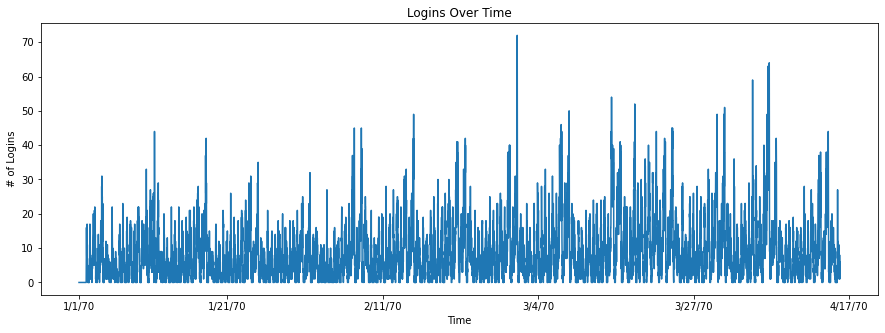

In [9]:
# plot each 15 minute interval on singular lineplot
_ = plt.figure(figsize=(15, 5))
_ = sns.lineplot(data=count_list)
_ = plt.title('Logins Over Time')
_ = plt.xlabel('Time')
_ = plt.ylabel('# of Logins')
positions = (0,1920,3936,5952,7968,9984)
labels = ('1/1/70', '1/21/70', '2/11/70', '3/4/70', '3/27/70', '4/17/70')
_ = plt.xticks(positions, labels)

This is a bit congested but it shows some drastic peaks and valleys. There appears to be a cyclical pattern every week, but let's break down this plot into smaller intervals to get a better understanding of the data.

### Single Day

In [10]:
# index for single day: Jan 2, 1970 - first full day of data
count_list_day = count_list[96:192]

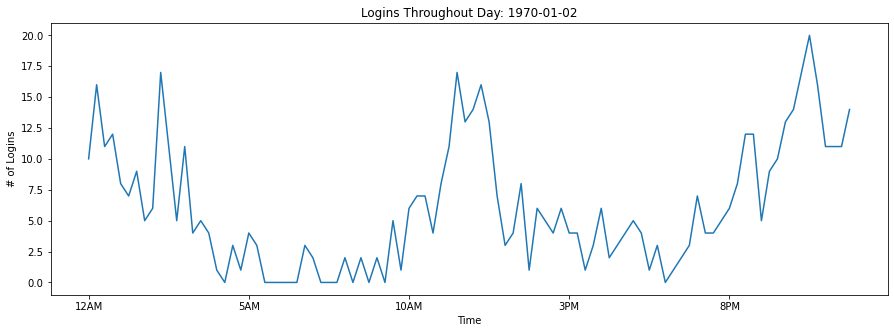

In [11]:
# plot 15 minute intervals of single day
_ = plt.figure(figsize=(15, 5))
_ = sns.lineplot(data=count_list_day)
_ = plt.title('Logins Throughout Day: 1970-01-02')
_ = plt.xlabel('Time')
_ = plt.ylabel('# of Logins')
positions = (0,20,40,60,80)
labels = ('12AM', '5AM', '10AM', '3PM', '8PM')
_ = plt.xticks(positions, labels)

This subset of a single day shows higher activity in the intervals between 12AM and 4AM, 10AM and 1PM, and 7PM and midnight, peaking around 10:30PM. This makes sense given the typical structure of a normal day, with people busy working during the day except for a lunch break midday.

### Week

In [12]:
# index for single week: Jan 2, 1970 - Jan 8, 1970 - first full day of data
count_list_week = count_list[96:768]

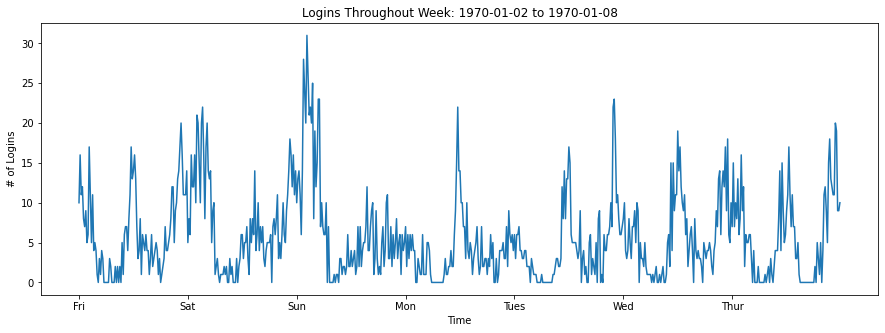

In [13]:
# plot 15 minute intervals of single week
_ = plt.figure(figsize=(15, 5))
_ = sns.lineplot(data=count_list_week)
_ = plt.title('Logins Throughout Week: 1970-01-02 to 1970-01-08')
_ = plt.xlabel('Time')
_ = plt.ylabel('# of Logins')
positions = (0,96,192,288,384,480,576)
labels = ('Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thur')
_ = plt.xticks(positions, labels)

The highest point is early Sunday morning, just after midnight. The daily patterns are roughly similar, with peaks at the start, middle, and end of a day. If we extend this to 4 weeks we can see if the peak on early Sunday morning is recurring.

### 4 Week

In [14]:
# index for 4 week period: Jan 2, 1970 - Jan 29, 1970
count_list_4week = count_list[96:2784]

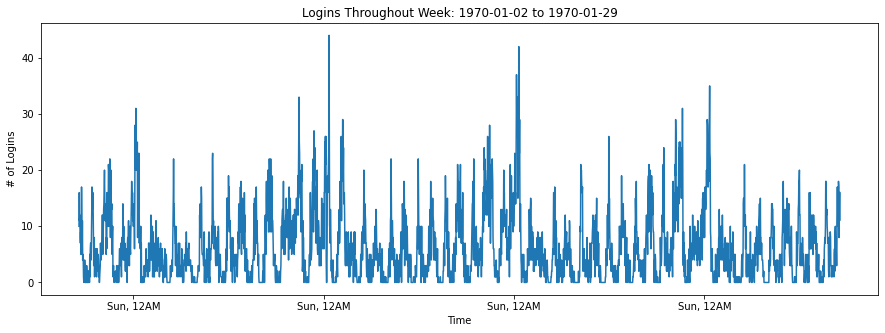

In [15]:
# plot 15 minute intervals of 4 week period
_ = plt.figure(figsize=(15, 5))
_ = sns.lineplot(data=count_list_4week)
_ = plt.title('Logins Throughout Week: 1970-01-02 to 1970-01-29')
_ = plt.xlabel('Time')
_ = plt.ylabel('# of Logins')
positions = (192,864,1536,2208)
labels = ('Sun, 12AM', 'Sun, 12AM', 'Sun, 12AM', 'Sun, 12AM')
_ = plt.xticks(positions, labels)

### Summary

The pattern holds and it looks like early Sunday morning is the period with the most users on any given week. Thus in summary, on a daily level the user activity is higher during non-traditional work times, and on a weekly level there is a peak during the weekend, specifically early Sunday morning.

## Part 2 - Experiment and metrics design

1. The key measure of success in this experiment is total number of tolls crossed. This is a direct measurement of the trips taken between Gotham and Metropolis, and represents a commitment of drivers to make the commute from one city to another. 

2. The experiment will take place across a month long period. The entire population of Ultimate drivers from both locations will be broken up into 2 groups at random. One group will be notified of being reimbursed for their toll, the others will not receive any different instructions. Data will be collected for each Ultimate transaction, including date, time, location, name of driver, main location of driver, and whether or not the pickup required crossing the toll. This will be the target variable in the analysis.
    
    b. To measure statistical significance, we can use a Mann-Whitney U test to verify whether or not a driver's reimbursement effects the distribution of pick up times for Ultimate drivers
    
    c. If it is less than 5% likely that the results show no variation in total number of toll trips, then we can safely conclude that the difference is significant. This can be presented as a suggestion to the operations team that a change in toll prices would be beneficial in increasing homogeneity between the two city's drivers.

## Part 3 - Predictive modeling

In [16]:
# read in json file to dataframe
df_login = pd.read_json('ultimate_data_challenge.json')
df_login.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [17]:
df_login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [18]:
# for loop that counts missing data per column
for column in df_login:
    num = len(df_login.loc[df_login[column].isna()])
    print(column, '- ', num)

city -  0
trips_in_first_30_days -  0
signup_date -  0
avg_rating_of_driver -  8122
avg_surge -  0
last_trip_date -  0
phone -  396
surge_pct -  0
ultimate_black_user -  0
weekday_pct -  0
avg_dist -  0
avg_rating_by_driver -  201


In [19]:
# delete rows with missing data
df_login_nona = df_login[df_login['avg_rating_of_driver'].notna() & \
                         df_login['phone'].notna() & \
                         df_login['avg_rating_by_driver'].notna()]

# verify that there are no more missing values
for column in df_login_nona:
    num = len(df_login_nona.loc[df_login_nona[column].isna()])
    print(column, '- ', num)

city -  0
trips_in_first_30_days -  0
signup_date -  0
avg_rating_of_driver -  0
avg_surge -  0
last_trip_date -  0
phone -  0
surge_pct -  0
ultimate_black_user -  0
weekday_pct -  0
avg_dist -  0
avg_rating_by_driver -  0


In [20]:
df_login_nona.shape

(41445, 12)

In [21]:
df_login = df_login_nona

In [22]:
df_login.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000,41445.000000
mean,2.609675,4.601720,1.073822,8.898709,61.254897,5.460046,4.776446
std,4.059336,0.616104,0.198747,18.322061,34.813848,5.145174,0.404606
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,37.500000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.780000,5.000000
75%,3.000000,5.000000,1.070000,11.100000,100.000000,6.490000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,79.690000,5.000000


In [23]:
# convert last_trip_date column to date_time and figure out max value - use this as current date
df_login['last_trip_date'] = pd.to_datetime(df_login['last_trip_date'])
current_date = max(df_login['last_trip_date'])
current_date

Timestamp('2014-07-01 00:00:00')

In [24]:
# initialize list that will store binary value 
active_users = []

# for loop that checks whether or not user is active, stores status in active_users list
for x in df_login['last_trip_date']:
    delta = current_date - x
    if delta < datetime.timedelta(days=30):
        active_users.append(1)
    else:
        active_users.append(0)

In [25]:
# add active_user status column to df
df_login['active_user'] = active_users

In [26]:
df_login.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [27]:
# find % of users that are active
active_users_per = len(df_login.loc[df_login['active_user'] == 1]) / len(df_login)
active_users_per * 100

40.07238508867174

1) Just over 40% of the provided users are adopted users.

In [28]:
# findlatest signup date
latest_signup_date = max(df_login['signup_date'])
latest_signup_date

'2014-01-31'

In [29]:
# findlatest earliest date
latest_signup_date = min(df_login['signup_date'])
latest_signup_date

'2014-01-01'

Every user in the dataset signed up in January 2014, thus our active user column represents the 6th month for each of the users. We can procede with the modeling using the active users column as the target feature.

### Preparing Data for Modeling

In [30]:
# convert ultimate_black_user column to type int
df_login['ultimate_black_user'] = df_login['ultimate_black_user'].astype(int)

In [31]:
df_login['city'].value_counts()

Winterfell        19161
Astapor           13509
King's Landing     8775
Name: city, dtype: int64

In [32]:
# one-hot encode city column
one_hot = pd.get_dummies(df_login['city'])
df_login = df_login.drop('city', axis = 1)
df_login = df_login.join(one_hot)

In [33]:
# one-hot encode phone column
one_hot = pd.get_dummies(df_login['phone'])
df_login = df_login.drop('phone', axis = 1)
df_login = df_login.join(one_hot)

In [34]:
df_login.head(10)

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user,Astapor,King's Landing,Winterfell,Android,iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,1,0,1,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,0,1,0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,1,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,1,0,1,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,0,0,0,1,1,0
5,2,2014-01-09,3.5,1.00,2014-06-06,0.0,1,100.0,10.56,5.0,1,0,0,1,0,1
7,2,2014-01-28,5.0,1.00,2014-01-29,0.0,0,100.0,2.04,5.0,0,0,0,1,0,1
8,2,2014-01-21,4.5,1.00,2014-02-01,0.0,0,100.0,4.36,5.0,0,0,0,1,1,0
10,1,2014-01-13,5.0,1.00,2014-05-30,0.0,1,100.0,4.28,4.9,0,0,0,1,0,1
11,3,2014-01-06,4.0,1.00,2014-01-10,0.0,0,100.0,3.81,5.0,0,0,0,1,0,1


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [36]:
# select appropriate columns for modeling
columns = df_login.columns
columns = columns.drop(['last_trip_date', 'signup_date', 'active_user'])

# declare X and y variables
X = df_login[columns]
y = df_login['active_user']

In [37]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# instantiate RFC and fit model to training data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
rf.feature_importances_

array([0.08029668, 0.07999733, 0.06844234, 0.08832181, 0.03554539,
       0.14038342, 0.26922291, 0.11977157, 0.01699783, 0.04922171,
       0.01182126, 0.02072989, 0.01924786])

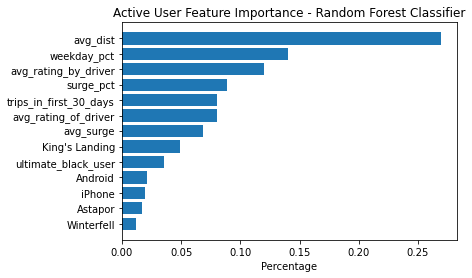

In [40]:
# sort the columns by importance
sorted_index = rf.feature_importances_.argsort()

# plot RFC feature importance
plt.barh(columns[sorted_index], rf.feature_importances_[sorted_index])
plt.title('Active User Feature Importance - Random Forest Classifier')
plt.xlabel('Percentage')
plt.show()

The above Random Forest Classifier feature importance graph shows that avg_dist, which is the average distance in miles per trip taken in the first 30 days after signup, is the most important feature. This means that we can predict the likelihood of someone becoming an active user based on distance data from the first 30 days of them signing up.

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            accuracy_score, precision_recall_curve

We will use accuracy as the primary metric of success, since we want a balance of precision and recall and the class distribution is relatively balanced (60/40)

In [42]:
# Instantiate RFC model with select parameters, fit, predict, and calculate accuracy score
rfc_best = RandomForestClassifier(random_state=42, max_features='auto', n_estimators=100, max_depth=6, criterion='entropy')
rfc_best.fit(X_train, y_train)
y_pred = rfc_best.predict(X_test)
rfc_accuracy = accuracy_score(y_test, y_pred)

# use cross_val_score to get a sense of variance
rfc_cv_score = cross_val_score(rfc_best, X_train, y_train, cv=5, scoring='roc_auc')
print(rfc_cv_score)
print("Mean AUC Score: ", rfc_cv_score.mean())

[0.84549271 0.84566653 0.84162325 0.84374208 0.84201853]
Mean AUC Score:  0.8437086176364508


Among the 5 cv sets, the roc_auc has a range of 0.004 which shows good promise for consistency of results

In [43]:
print('Classification Report')
print('-----------------------------------------------------')
print(classification_report(y_test, y_pred))

Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      4916
           1       0.76      0.65      0.70      3373

    accuracy                           0.77      8289
   macro avg       0.77      0.76      0.76      8289
weighted avg       0.77      0.77      0.77      8289



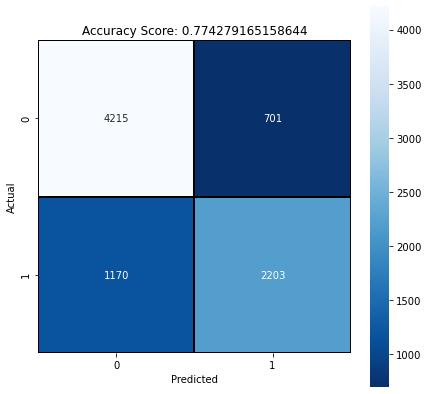

In [44]:
# plot confusion matrix in seaborn heatmap
cm_rfc = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
sns.heatmap(cm_rfc, annot=True, fmt='.0f', linewidth=1, linecolor='black', square = True, cmap = 'Blues_r');
plt.ylabel('Actual');
plt.xlabel('Predicted');
all_sample_title = 'Accuracy Score: {0}'.format(rfc_accuracy)
plt.title(all_sample_title);

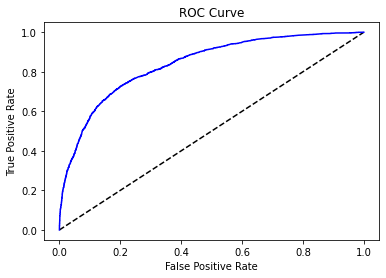

ROC_AUC:  0.8389459673176427


In [45]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = rfc_best.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('ROC_AUC: ', roc_auc)

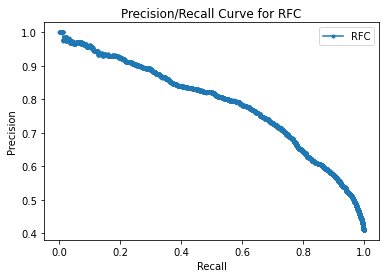

In [46]:
# plot precision/recall curve 
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision, marker='.', label='RFC')
plt.title('Precision/Recall Curve for RFC')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [47]:
# bootstrapping

n_iters = 10
accuracy = []

for i in range(n_iters):
    
    # split data into training and test set, instantiate RFC model
    X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.2)
    model = RandomForestClassifier(random_state=i, max_features='auto', n_estimators=100, \
                                   max_depth=6, criterion='entropy')
    # fit and predict
    model.fit(X_train_b, y_train_b)
    y_pred_b = model.predict(X_test)
    
    # calculate accuracies and append to list
    score_accuracy = accuracy_score(y_test_b, y_pred_b)
    accuracy.append(score_accuracy)

In [48]:
# get 95% confidence intervals for precision and recall
lower = max(0.0, np.percentile(accuracy, 2.5))
upper = min(1.0, np.percentile(accuracy, 97.5))
print('%.1f confidence interval Accuracy: %.1f%% and %.1f%%' % (95, lower*100, upper*100))

95.0 confidence interval Accuracy: 52.4% and 54.1%


Bootstrapping reveals tight confidence interval for accuracy metric.

### Summary 

2) The model I chose was a Random Forest Classification model, since it has a useful feature importance metric. Using this allowed me to see which features would have the most influence on the target. Ultimately I ended up using most of the features, given that this produced the best results. The risk of overfitting was mitigated by using cross-validation as well as bootstrapping. I achieved an accuracy score of 0.77 which is reasonable considering the uncertainty of the problem at hand. I definitely think these results can be improved on with more hyper-parameter tuning and testing different models. I neglected to thoroughly find the best hyper-parameters for the model given the size of the data and how long it would take to run the code. I manually tested a few different combinations and settled on the above set of hyper-parameters. As for other models, they are definitely worth exploring with more time devoted to the project. 

3) Ultimate can use these results to help improve their customer retention. With an ability to model whether or not a user will be active in 6 months, they can choose to target certain customers with specific advertising that might encourage more usage. For example, if a user is not showing signs of becoming a long-term active user in the first month of signing up, they could send out promotional advertising to encourage these individuals to stick around and potentially become a long-term user of there services.